In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('kc_house_data.csv',sep=',', encoding = "UTF-8")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Pas de valeurs nulles

In [4]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


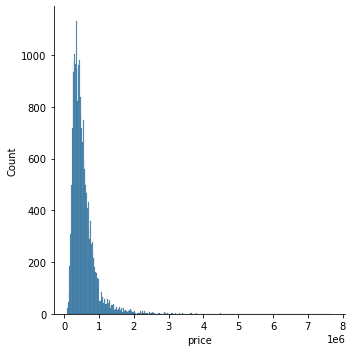

In [5]:
sns.displot(df, x='price')

# On voit que la majorité des maisons ont un prix inférieur à 1 000 000. Il sera donc plus difficile d'évaluer correctements les prix > 1 000 000 car on a moins de données.

In [6]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

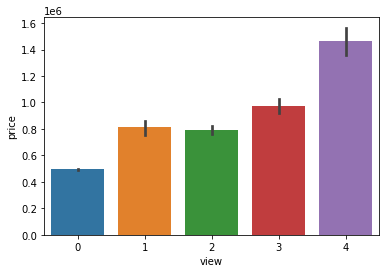

In [7]:
sns.barplot(x = 'view', y = 'price', data = df )

In [8]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

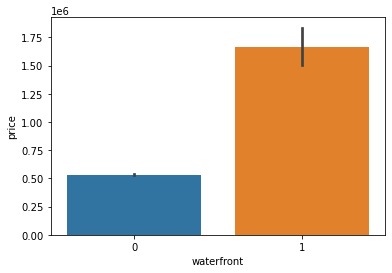

In [9]:

df[['price', 'waterfront']].groupby(['waterfront'], as_index=True).mean()
sns.barplot(x = 'waterfront', y = 'price', data = df )


# En moyenne, les maisons avec vue sur mer et/ou une vue bien noté coûtent plus cher que les autres

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

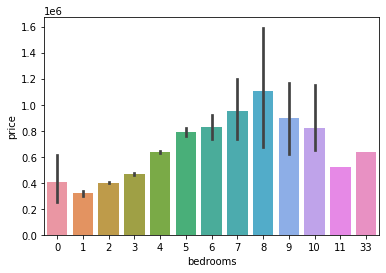

In [10]:
sns.barplot(x = 'bedrooms', y = 'price', data = df )

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

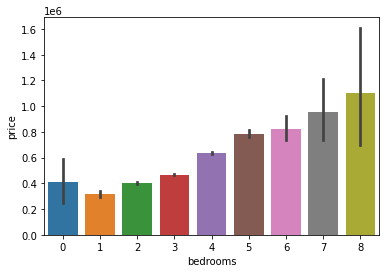

In [12]:
df = df[df.bedrooms!= 9]
df = df[df.bedrooms!= 10]
df = df[df.bedrooms!= 11]
df = df[df.bedrooms!= 33]
sns.barplot(x = 'bedrooms', y = 'price', data = df )


# En éliminant les outliers, on se rend compte que le nombre de chambres est positivement et linéairement correlé au prix

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

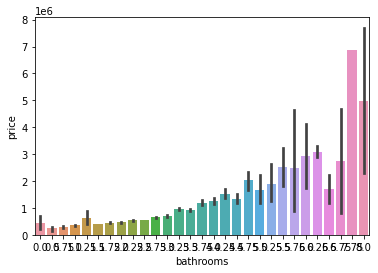

In [13]:
sns.barplot(x = 'bathrooms', y = 'price', data = df )

In [14]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1929
1.50    1446
2.75    1185
3.00     749
3.50     731
3.25     589
3.75     155
4.00     135
4.50      98
4.25      79
0.75      72
4.75      23
5.00      21
5.25      12
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.75       1
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

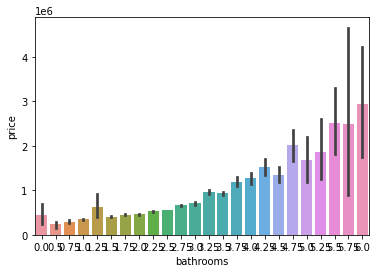

In [15]:
df = df[df.bathrooms!= 8]
df = df[df.bathrooms!= 7.75]
df = df[df.bathrooms!= 6.75]
df = df[df.bathrooms!= 6.5]
df = df[df.bathrooms!= 6.25]
df = df[df.bathrooms!= 7.5]
sns.barplot(x = 'bathrooms', y = 'price', data = df )

# Même remarque que pour les chambres

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

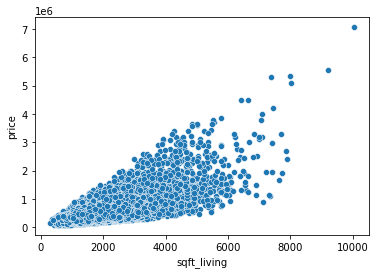

In [16]:
sns.scatterplot(x='sqft_living', y='price',data =df)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

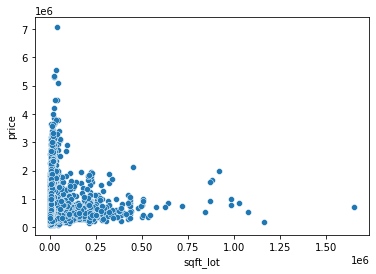

In [17]:
sns.scatterplot(x='sqft_lot', y='price',data =df)

# Au vu du graphique, la variable sqft_lot ne semble pas linéairement corrélé au prix

<AxesSubplot:xlabel='floors', ylabel='price'>

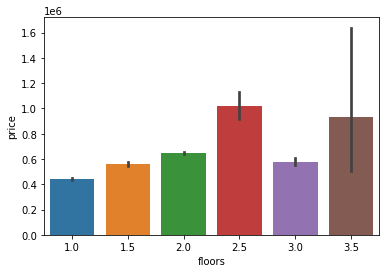

In [18]:
sns.barplot(x='floors',y='price',data=df)

In [19]:
df['floors'].value_counts()

1.0    10677
2.0     8228
1.5     1910
3.0      612
2.5      158
3.5        8
Name: floors, dtype: int64

<AxesSubplot:xlabel='isrenov', ylabel='price'>

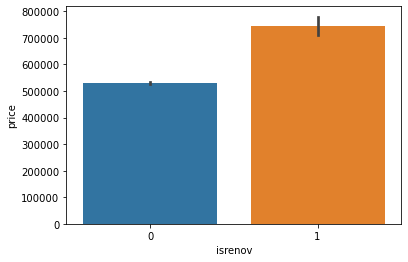

In [20]:
isrenov = []
for i in df['yr_renovated']:
    if i > 0 :
        isrenov.append(1)
    else :
        isrenov.append(0)
df['isrenov'] = isrenov
sns.barplot(x = 'isrenov', y = 'price', data = df )

# En moyenne, une maison rénovée coûte plus cher que les autres

<AxesSubplot:xlabel='zipcode', ylabel='price'>

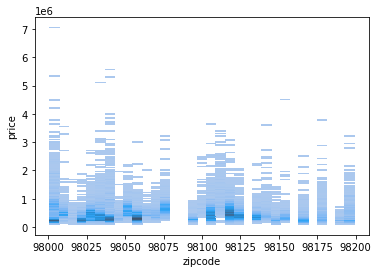

In [21]:
sns.histplot(x='zipcode', y='price',data =df)

<AxesSubplot:xlabel='isbase', ylabel='price'>

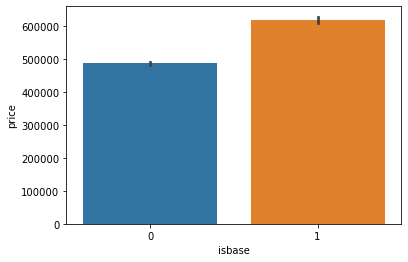

In [22]:
isbase = []
for i in df['sqft_basement']:
    if i > 0 :
        isbase.append(1)
    else :
        isbase.append(0)
df['isbase'] = isbase
sns.barplot(x = 'isbase', y = 'price', data = df )

# En moyenne, une maison avec une cave coûte plus cher que les autres

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

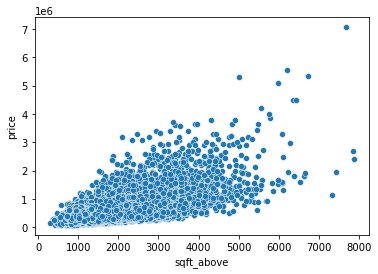

In [23]:
sns.scatterplot(x='sqft_above', y='price', data = df)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

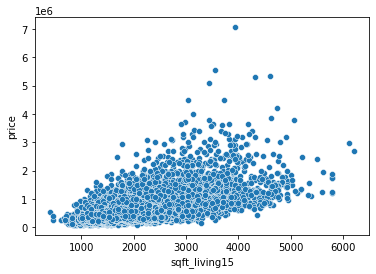

In [24]:
sns.scatterplot(x='sqft_living15', y='price', data = df)

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

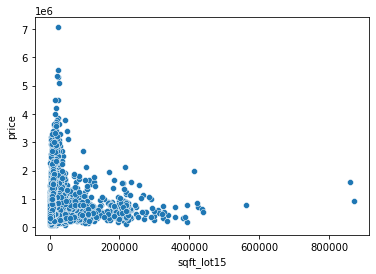

In [25]:
sns.scatterplot(x='sqft_lot15', y='price', data = df)

# Au vu du graphique, la variable sqft_lot15 ne semble pas linéairement corrélé au prix

<AxesSubplot:xlabel='grade', ylabel='price'>

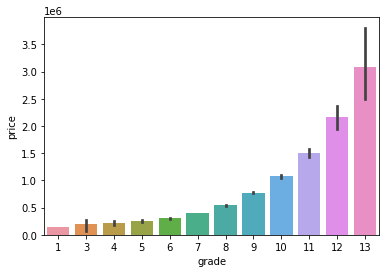

In [26]:
sns.barplot(x = 'grade', y = 'price', data = df )

<AxesSubplot:xlabel='condition', ylabel='price'>

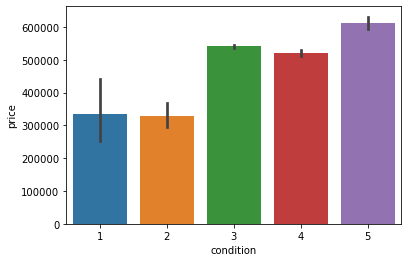

In [27]:
sns.barplot(x = 'condition', y = 'price', data = df )

#  Les variables conditions et grade semblent linéairement et positivement corrélés avec le prix

In [28]:
df.drop(columns = ['date'], inplace = True)
df.drop(columns = ['zipcode'], inplace = True)
df.drop(columns = ['id'], inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,isrenov,isbase
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,0,0


# Les variables Date et Id ne semblent pas avoir d'incidence sur le prix. Le Zipcode peut être remplacé par la latitude et la longitude puisque c'est la même information sous une forme différente. Le reste des variables sont importants pour le calcul du prix même si j'ai du mal à voir l'impact de sqft_lot et sqft_lot15 sur le prix. Je vais vérifier ca en voyant leur incidence sur la précision des régressions linéaires.

In [29]:

Y = df['price'].values
X = df['sqft_living'].values[:,np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)

model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 67408351590.48816
R squared 0.48985315719504463


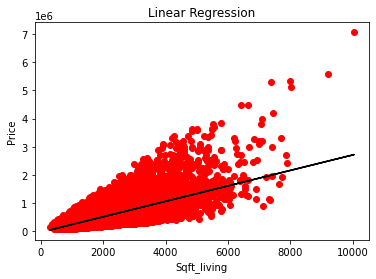

In [30]:
plt.scatter(X,Y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(X,model.predict(X),color="k")
plt.show()

In [31]:
Y = df['price'].values
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built','yr_renovated','lat', 'long', 'sqft_living15','sqft_lot15']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)

model=LinearRegression()   
model.fit(X_train,Y_train)  
predicted=model.predict(X_test) 


print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 41448914999.22421
R squared 0.6863143419823825


# R2 multi-linear > R2 linear ce qui est tout à fait logique puisqu'on prend plus de variables importantes en compte. La variable sqft_living est insuffisante pour prédire correctement le prix d'une maison.

In [32]:
Y = df['price'].values
X = df[['bedrooms', 'bathrooms', 'sqft_living','waterfront', 'floors', 'view', 'condition', 'grade','sqft_above', 'sqft_basement','yr_built','isrenov', 'lat', 'long', 'sqft_living15']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)


lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

X_train_fit = poly.fit_transform(X_train) 
lg.fit(X_train_fit, Y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(Y_test, predicted))
print("R squared: ", metrics.r2_score(Y_test,predicted))

MSE:  35043850144.21728
R squared:  0.7347879144203093


# La régression polynomiale est plus précise ici que la régression multi-linéaire ce qui est logique. On peut noter ici que je n'ai pas pris en compte les variables sqft_lot et sqft_lot15 car cela faisait baisser le R2. 

In [33]:
import scipy as sc
z_scores = sc.stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


# On élimine le reste des outliers soit les valeurs qui ont un déviation de la moyenne supérieur à 3 fois la déviation normale.

In [34]:

Y = df['price'].values
X = df['sqft_living'].values[:,np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)

model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 31740170987.921047
R squared 0.3846377942475826


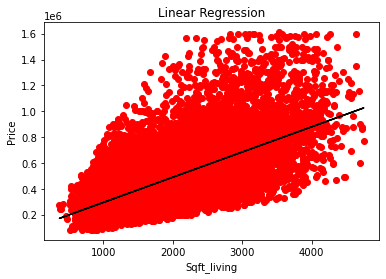

In [35]:
plt.scatter(X,Y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(X,model.predict(X),color="k")
plt.show()

In [36]:
Y = df['price'].values
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built','yr_renovated','lat', 'long', 'sqft_living15','sqft_lot15']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)

model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 16813665085.537287
R squared 0.6740252584727391


In [37]:
Y = df['price'].values
X = df[['bedrooms', 'bathrooms', 'sqft_living','waterfront', 'floors', 'view', 'condition', 'grade','sqft_above', 'sqft_basement','yr_built','isrenov', 'lat', 'long', 'sqft_living15']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=30)


lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

X_train_fit = poly.fit_transform(X_train) 
lg.fit(X_train_fit, Y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(Y_test, predicted))
print("R squared: ", metrics.r2_score(Y_test,predicted))

MSE:  9898508790.725933
R squared:  0.8080927728637995


# L'élimination des outliers a eu un effet positif sur la précision de la régression polynomiale dont la précision devient supérieur à 80% ce qui est correct. Par contre, le R2 des deux premiers algorithmes baissent. 
# Mais les écarts de prédiction diminuent sensiblement après l'élimination des outliers ce qui rend donc les 3 modèles un peu plus fiables.